In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# The tech stocks we'll use for this analysis
tech_list = [1,2,3,4]
df=pd.DataFrame()
company_list=[]
com1=pd.DataFrame()
com2=pd.DataFrame()
com3=pd.DataFrame()
com4=pd.DataFrame()
com5=pd.DataFrame()
for file in os.listdir('/kaggle/input/stockp'):
    if(file[0]!='t'):
        temp=pd.read_csv(os.path.join('/kaggle/input/stockp',file))
        temp['Company']=int(file[0])
        df=df.append(temp)
        if(int(file[0])==1):com1=temp
        elif(int(file[0])==2):com2=temp
        elif(int(file[0])==3):com3=temp
        else:com4=temp
        company_list.append(temp)
    else:
        temp = pd.read_csv(os.path.join('/kaggle/input/stockp',file))
        com5 = temp
        
    
company_list=sorted(company_list,key=lambda x:x.loc[1,'Company'])
print(com5[:int(2532/4)])
com5['Close']=0

com5.drop(["ID"],inplace=True,axis=1)
company_list[3]=pd.concat([com4,com5[:int(2532/4)]])
com4=company_list[3]

company_list[2]=pd.concat([com3,com5[int(2532/4):int(2532/4)*2]])
com3=company_list[2]
company_list[0]=pd.concat([com1,com5[int(2532/4)*2:int(2532/4)*3]])
com1=company_list[0]
company_list[1]=pd.concat([com2,com5[int(2532/4)*3:int(2532/4)*4]])
com2=company_list[1]

company_list[3].reset_index(inplace = True, drop = True)
com4.reset_index(inplace = True, drop = True)
com3.reset_index(inplace = True, drop = True)
com2.reset_index(inplace = True, drop = True)
com1.reset_index(inplace = True, drop = True)
company_list[2].reset_index(inplace = True, drop = True)
company_list[1].reset_index(inplace = True, drop = True)
company_list[0].reset_index(inplace = True, drop = True)
com1['Open_pct']=com1['Open'].pct_change()
com1['High_pct']=com1['High'].pct_change()
com1['Low_pct']=com1['Low'].pct_change()
com1['Adj_pct']=com1['Adj Close'].pct_change()
com2['Open_pct']=com2['Open'].pct_change()
com2['High_pct']=com2['High'].pct_change()
com2['Low_pct']=com2['Low'].pct_change()
com2['Adj_pct']=com2['Adj Close'].pct_change()
com3['Open_pct']=com3['Open'].pct_change()
com3['High_pct']=com3['High'].pct_change()
com3['Low_pct']=com3['Low'].pct_change()
com3['Adj_pct']=com3['Adj Close'].pct_change()
com4['Open_pct']=com4['Open'].pct_change()
com4['High_pct']=com4['High'].pct_change()
com4['Low_pct']=com4['Low'].pct_change()
com4['Adj_pct']=com4['Adj Close'].pct_change()

           Date    Open    High     Low  Adj Close       Volume  Company   ID
0    17-07-2020  101.04  102.52   99.28      99.93  139950000.0      4.0    0
1    20-07-2020  101.28  110.03   99.24     109.62  256821000.0      4.0    1
2    21-07-2020  109.12  111.60  103.88     104.46  241608000.0      4.0    2
3    22-07-2020  106.65  108.45  104.05     105.86  212416500.0      4.0    3
4    23-07-2020  112.07  112.49   98.92     101.04  364927500.0      4.0    4
..          ...     ...     ...     ...        ...          ...      ...  ...
628  13-01-2023  116.49  122.75  115.55     122.39  180439300.0      4.0  628
629  17-01-2023  125.67  131.67  125.11     131.52  186477000.0      4.0  629
630  18-01-2023  136.41  136.66  127.05     128.64  195680300.0      4.0  630
631  19-01-2023  127.06  129.93  124.39     127.21  170291900.0      4.0  631
632  20-01-2023  128.37  133.69  127.26     133.37  138429900.0      4.0  632

[633 rows x 8 columns]


NOTE : Keep looking for observations written in the code.

.

In [2]:
# General info
company_list[0].info()
company_list[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3163 non-null   object 
 1   Open       3163 non-null   float64
 2   High       3163 non-null   float64
 3   Low        3163 non-null   float64
 4   Close      3163 non-null   float64
 5   Adj Close  3163 non-null   float64
 6   Volume     3163 non-null   float64
 7   Company    3163 non-null   float64
dtypes: float64(7), object(1)
memory usage: 197.8+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09,1.0
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08,1.0
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09,1.0
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08,1.0
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08,1.0
...,...,...,...,...,...,...,...,...
3158,2023-01-13,132.12,134.89,131.71,0.00,134.75,5.775800e+07,1.0
3159,2023-01-17,134.81,137.24,134.02,0.00,136.11,6.364660e+07,1.0
3160,2023-01-18,136.82,138.61,135.19,0.00,135.12,6.967280e+07,1.0
3161,2023-01-19,134.00,136.21,133.71,0.00,135.28,5.828040e+07,1.0


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. 

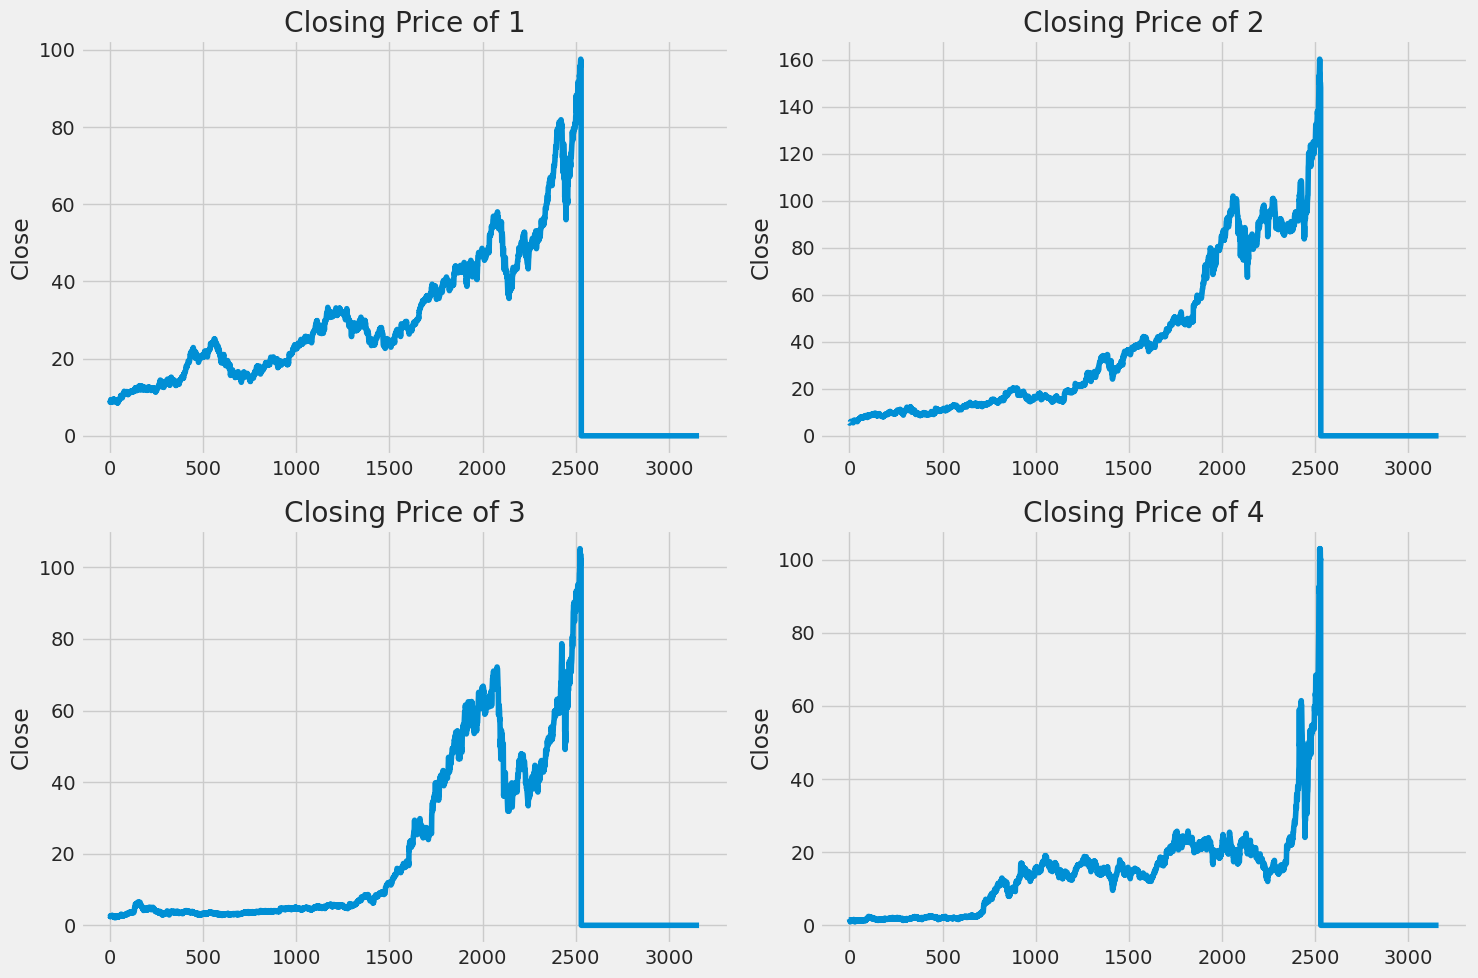

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.

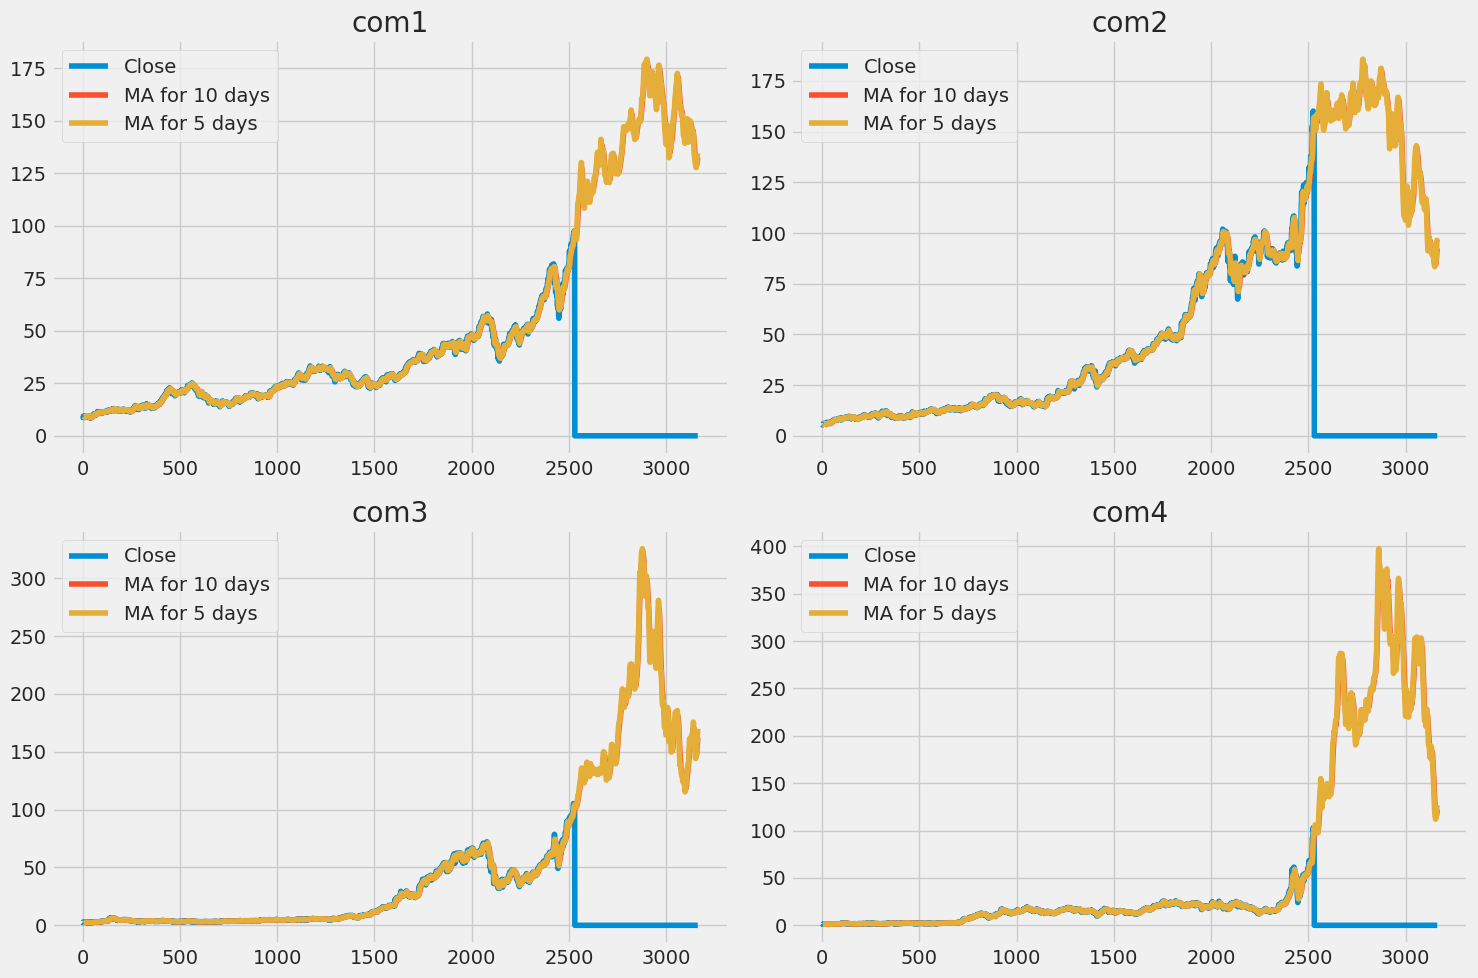

In [19]:
ma_day = [10, 5]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Open'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

com1[['Close', 'MA for 10 days', 'MA for 5 days']].plot(ax=axes[0,0])
axes[0,0].set_title('com1')

com2[['Close', 'MA for 10 days', 'MA for 5 days']].plot(ax=axes[0,1])
axes[0,1].set_title('com2')

com3[['Close', 'MA for 10 days', 'MA for 5 days']].plot(ax=axes[1,0])
axes[1,0].set_title('com3')

com4[['Close', 'MA for 10 days', 'MA for 5 days']].plot(ax=axes[1,1])
axes[1,1].set_title('com4')

fig.tight_layout()

Observation : We tried to use moving averages in our data during linear regression but it was not giving us better result. So we decided to drop the idea. But usually MA + RSI gives good results.The above graphs are not correct after 2530 so please ignore.Though we can see MA 5 is just dominating the group.


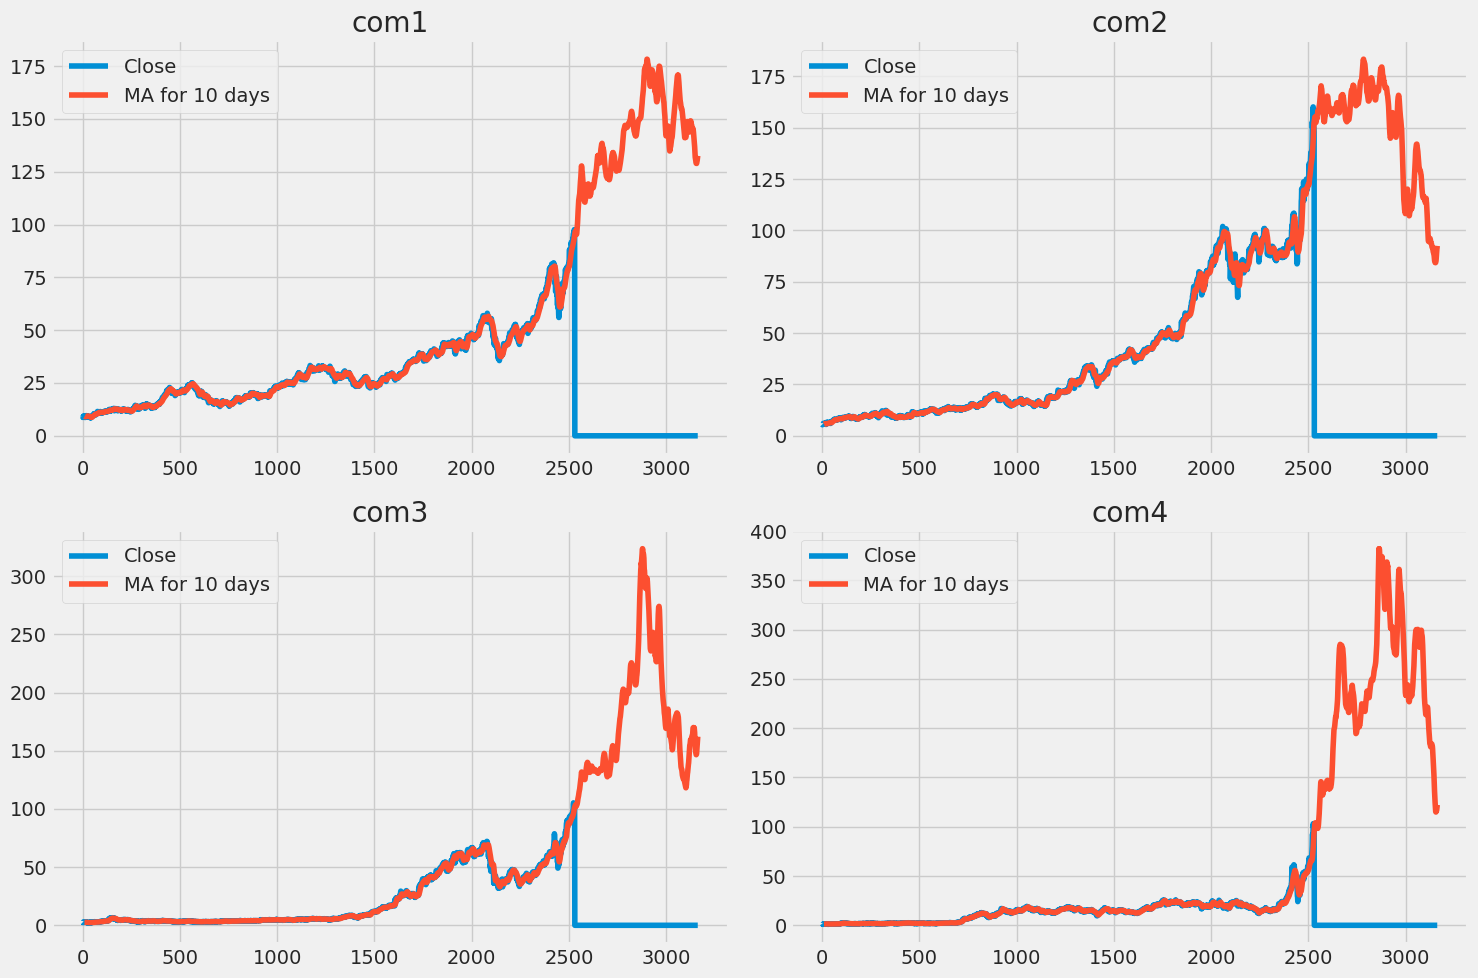

In [20]:

        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

com1[['Close', 'MA for 10 days']].plot(ax=axes[0,0])
axes[0,0].set_title('com1')

com2[['Close', 'MA for 10 days']].plot(ax=axes[0,1])
axes[0,1].set_title('com2')

com3[['Close', 'MA for 10 days']].plot(ax=axes[1,0])
axes[1,0].set_title('com3')

com4[['Close', 'MA for 10 days']].plot(ax=axes[1,1])
axes[1,1].set_title('com4')

fig.tight_layout()

# Company 1 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
com1.drop(['Company'],inplace=True,axis=1)

df = com1.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


[96.51923515077871, 97.87829600399498, 97.64119614941396, 97.8304001851348, 93.67826496992254, 91.44515244789842, 94.6718061344244, 93.98635768850123, 94.91252732419993, 95.49870164150458, 104.15758468812139, 110.23501313662948, 109.75234687728067, 110.05262460027457, 112.80749467005269, 111.5551791586275, 112.10721884769531, 110.39140527916618, 112.53918226335105, 115.51536448657022, 114.19502446279952, 114.89197648726079, 115.52032132587613, 116.73172179145256, 117.95209500127113, 123.29875450024493, 125.83593860335073, 124.4107866098958, 126.2277699578859, 125.30326089848839, 125.48917720353235, 129.03253559635613, 133.13018164485317, 130.86148196590034, 123.4672327567105, 116.98699496800666, 115.92504519641923, 117.55020491091396, 114.83304646008588, 112.16117121919115, 114.68741553250916, 115.48176854058919, 113.45046889511387, 110.84094405963481, 107.60907699140567, 107.7885863399322, 110.86043347141776, 108.78994007916981, 108.66610839450246, 110.94653795816376, 114.187513822984

# Company 1 LSTM

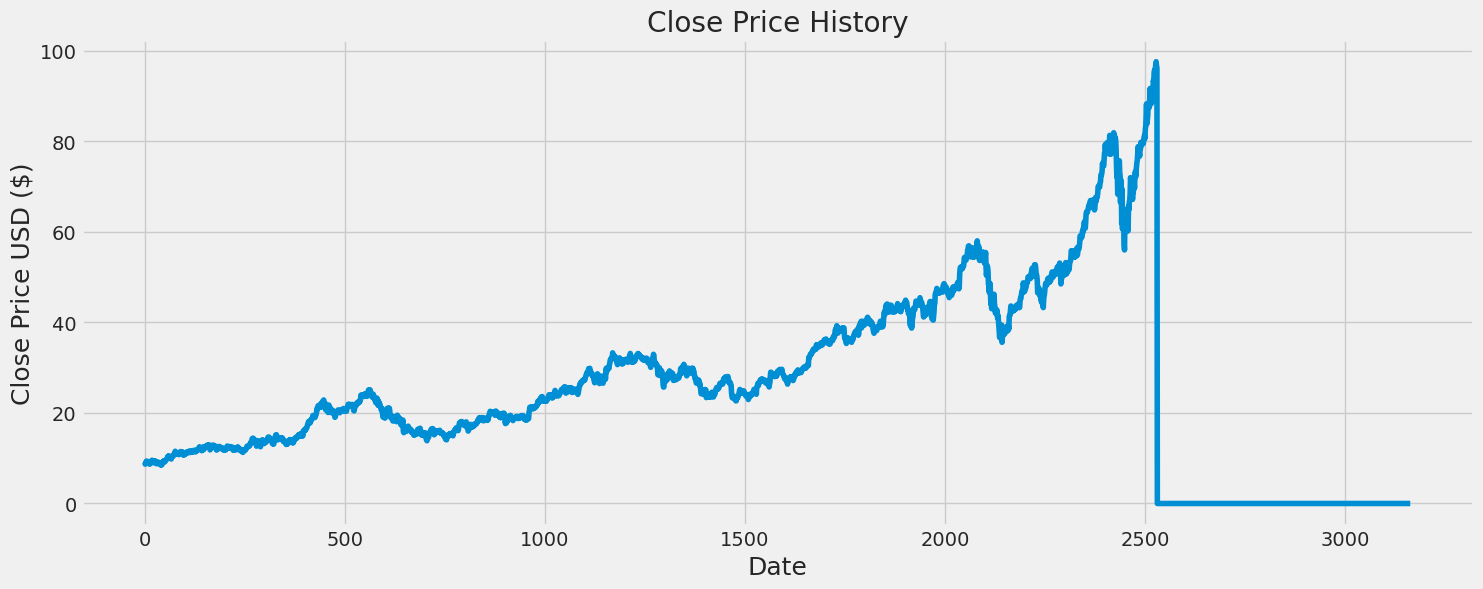

[[9.5000000e+00 9.4700000e+00 9.2300000e+00 7.9300000e+00 1.1333448e+09]
 [9.2500000e+00 9.2200000e+00 9.0000000e+00 7.5200000e+00 7.3945200e+08]
 [9.0100000e+00 9.0200000e+00 8.6300000e+00 7.4500000e+00 1.0228960e+09]
 ...
 [1.3682000e+02 1.3861000e+02 1.3519000e+02 1.3512000e+02 6.9672800e+07]
 [1.3400000e+02 1.3621000e+02 1.3371000e+02 1.3528000e+02 5.8280400e+07]
 [1.3535000e+02 1.3796000e+02 1.3435000e+02 1.3789000e+02 7.9972200e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
495/495 [==============================] - 4s 5ms/step - loss: 0.0014
Epoch 2/4
495/495 [==============================] - 3s 7ms/step - loss: 1.9370e-04
Epoch 3/4
495/495 [==============================] - 3s 5ms/step - loss: 1.4256e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
100.32199
100.32199096679688


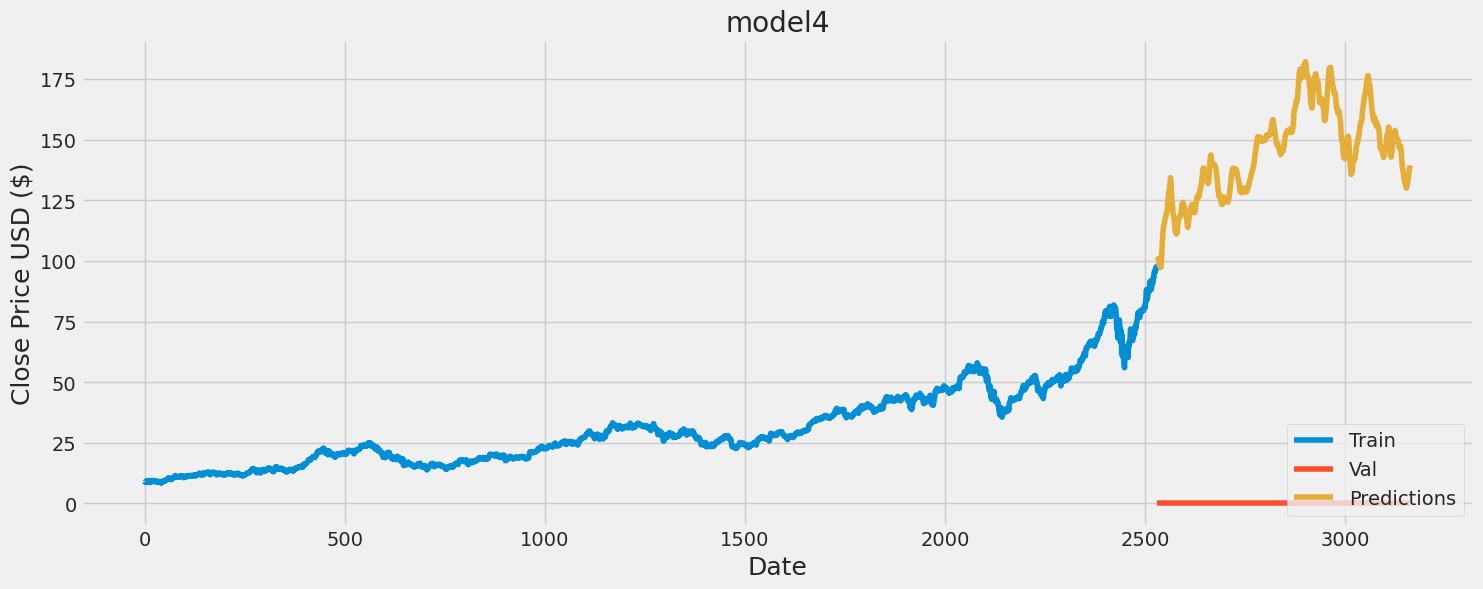

,Close,Predictions
2530,0.0,100.321991
2531,0.0,100.638184
2532,0.0,100.956886
2533,0.0,101.019699
2534,0.0,99.932419
...,...,...
3158,0.0,135.476334
3159,0.0,136.922150
3160,0.0,138.255814
3161,0.0,138.761749


In [11]:
# Get the stock quote
df = com1.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model1.add(Dense(1))

# Compile the model3
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model1.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model1.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

Observation : The market didn't moved as much during the testing phase. So linear regression should work good.

In [11]:
comp1=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*2+x)
comp1['Id']=L
comp1['Close']=final_sub

comp1.to_csv('comp1.csv',index=False)

# Linear Regression Company 2

In [8]:
from sklearn.linear_model import LinearRegression
com2.drop(['Company'],inplace=True,axis=1)
df = com2.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


[148.48598047734984, 160.3975104598748, 157.08823346096102, 155.2171514674348, 149.5308979237636, 150.5074598411973, 153.0219613789643, 150.57103025014413, 151.54473012193014, 153.33047832472874, 158.4275710413861, 155.88059388276588, 157.56113010703723, 160.4783736315949, 161.3397652189257, 158.61412633690193, 156.90179353601633, 154.92986361134388, 158.33098770878613, 158.79511449571447, 157.02008346811073, 159.18125918348977, 165.92747568429388, 163.5714338853324, 165.101572711829, 164.67261511576675, 166.03335271697873, 167.53973334112766, 172.48462895843576, 170.0217188114811, 170.19484756986589, 173.33950592380137, 175.12374918258647, 176.37306397698688, 168.1129180916289, 163.6306775202491, 159.21617883522833, 164.22320132241734, 159.93945156472412, 155.83778168160654, 155.62002533484673, 157.9532156699396, 154.18824872105915, 150.39228145066247, 147.6354609550575, 147.75493079638053, 156.28760038729064, 150.4388964288792, 151.95981471537323, 154.56863132742404, 158.465249025113

# LSTM company 2

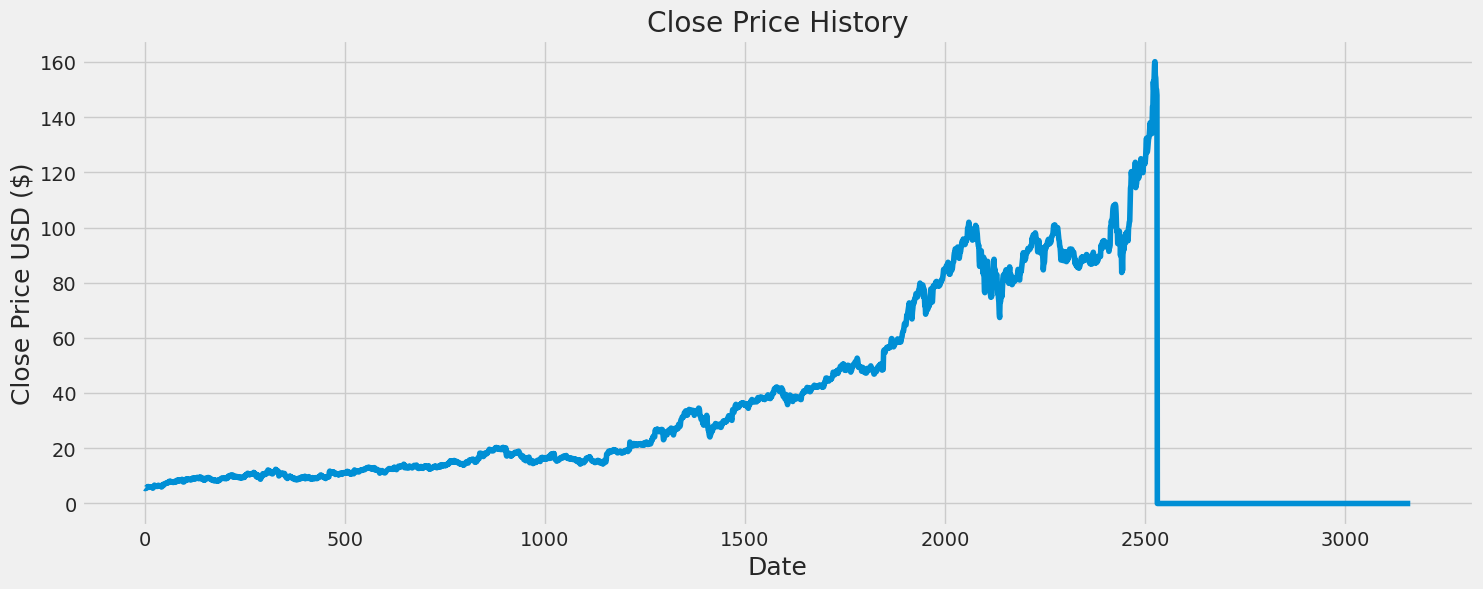

[[5.73000e+00 5.94000e+00 5.19000e+00 5.52000e+00 2.57326e+08]
 [5.49000e+00 5.73000e+00 5.28000e+00 5.36000e+00 1.94814e+08]
 [5.48000e+00 5.61000e+00 5.47000e+00 5.65000e+00 1.70596e+08]
 ...
 [9.73800e+01 9.93100e+01 9.54200e+01 9.55300e+01 7.95704e+07]
 [9.47400e+01 9.53800e+01 9.29800e+01 9.37800e+01 6.90027e+07]
 [9.38500e+01 9.74100e+01 9.32000e+01 9.71500e+01 6.73071e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
495/495 [==============================] - 4s 5ms/step - loss: 0.0012
Epoch 2/4
495/495 [==============================] - 3s 6ms/step - loss: 1.6215e-04
Epoch 3/4
495/495 [==============================] - 3s 5ms/step - loss: 1.5053e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
147.19211
147.19210815429688


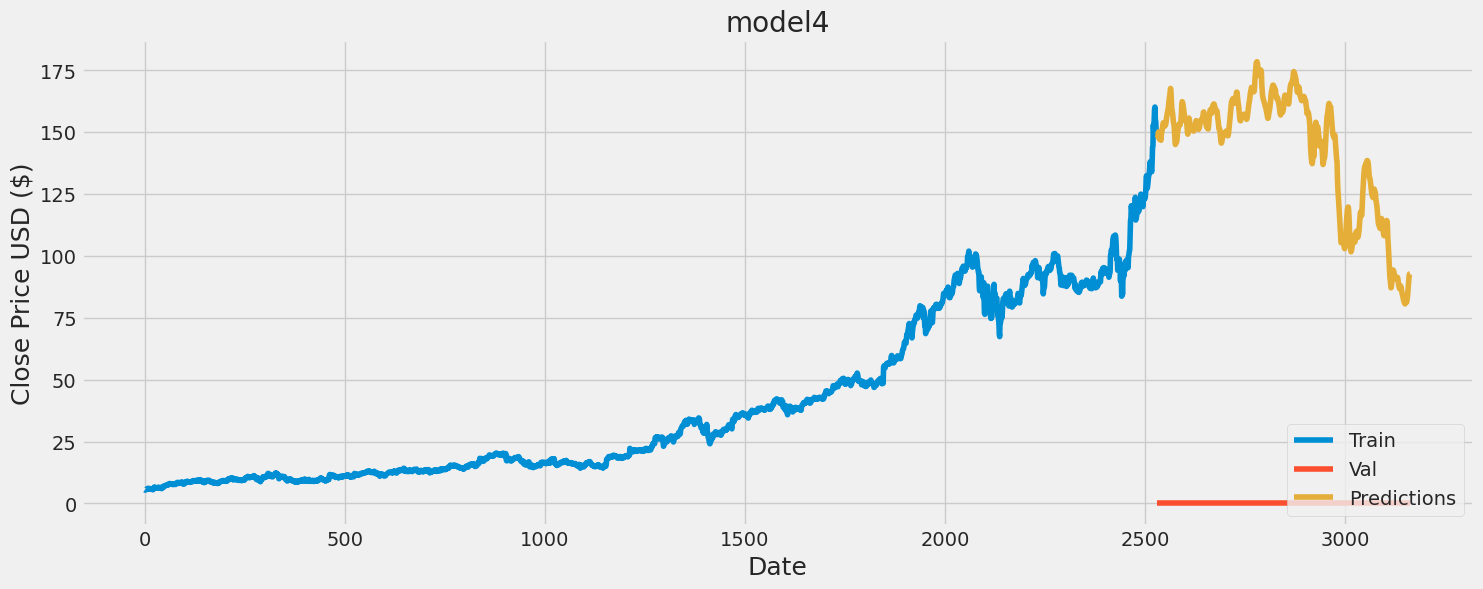

,Close,Predictions
2530,0.0,147.192108
2531,0.0,147.381882
2532,0.0,149.430054
2533,0.0,150.098633
2534,0.0,149.158966
...,...,...
3158,0.0,89.776398
3159,0.0,91.632851
3160,0.0,92.719383
3161,0.0,92.694130


In [12]:
# Get the stock quote
df = com2.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model2.add(Dense(1))

# Compile the model3
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model2.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model2.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

Observation : Again the market didn't moved upside but it moved downside slightly more than expected. This could possibly confuse linear regression.

In [14]:
comp2=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*2+x)
comp2['Id']=L
comp2['Close']=final_sub

comp2.to_csv('comp2.csv',index=False)

# Linear Regression Company 3

In [3]:
from sklearn.linear_model import LinearRegression
com3.drop(['Company'],inplace=True,axis=1)
df = com3.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(final_sub)


[101.92717745335844, 104.72824453811727, 103.7190632269865, 104.86622785975491, 102.2431002769491, 102.0578756239449, 104.27545087649801, 102.74137363972261, 104.83197281707693, 105.7763254267248, 106.50801474470748, 110.15333478444549, 111.81721340361985, 113.00609413273482, 112.89903093827449, 112.66034485438436, 111.63304892575472, 109.27860147914846, 114.05492017509144, 115.25848471640722, 116.02853355132389, 123.18956919890428, 123.00382401710404, 121.84343870271752, 122.06613982671315, 126.83906745994368, 127.17939585098536, 127.35891300924493, 127.92521263745195, 126.79013569639807, 130.99696988759203, 134.08184819087663, 138.47185794324835, 143.23029103070635, 132.10271739343003, 125.59424768444407, 121.65245254657012, 126.78137898007982, 124.80789941787529, 122.42969952400045, 129.62444359051548, 130.29269825244134, 126.8935554219407, 124.56250085473243, 122.49231834157199, 124.56433937924332, 125.25630152758472, 123.02456663871445, 123.98862754275005, 127.79937682746011, 129.

In [16]:
comp3=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*3+x)
comp3['Id']=L
comp3['Close']=final_sub

comp3.to_csv('comp3.csv',index=False)

# LSTM Company 3

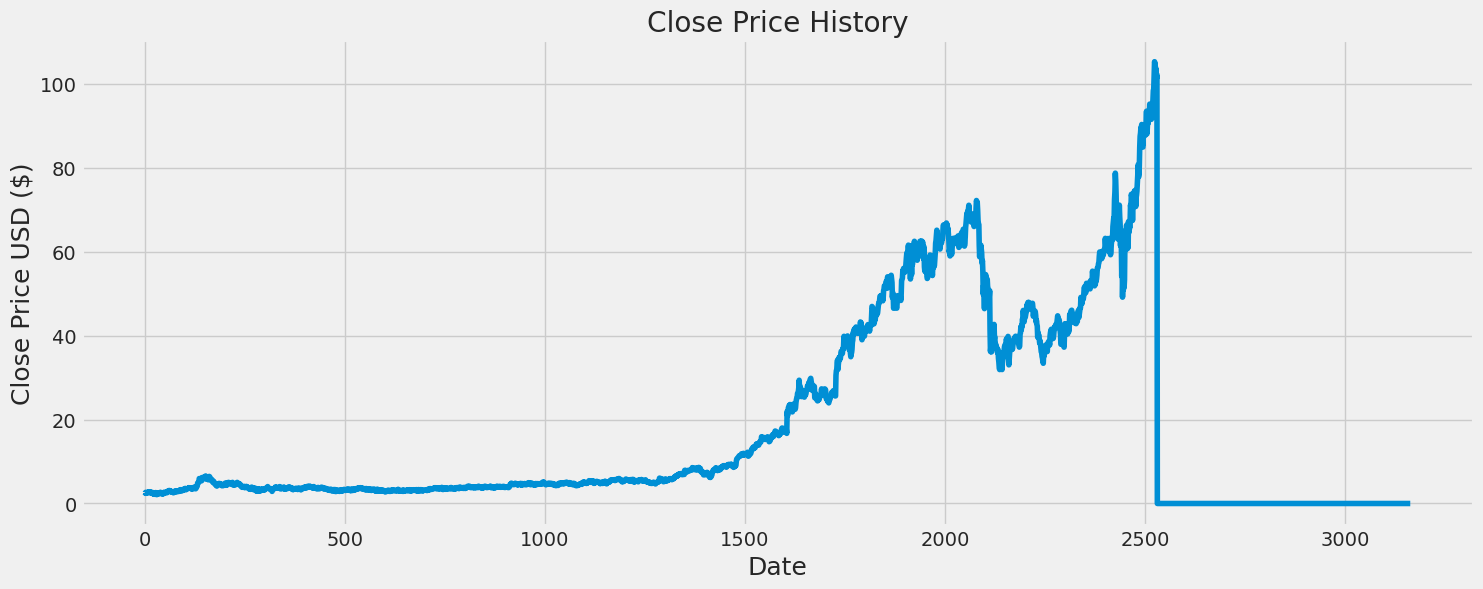

[[2.76000e+00 2.63000e+00 2.48000e+00 2.38000e+00 6.60808e+07]
 [2.62000e+00 2.54000e+00 2.73000e+00 2.15000e+00 6.23072e+07]
 [2.48000e+00 2.46000e+00 2.55000e+00 2.46000e+00 7.37008e+07]
 ...
 [1.76750e+02 1.78620e+02 1.72730e+02 1.73730e+02 4.39624e+07]
 [1.70530e+02 1.71840e+02 1.67150e+02 1.67850e+02 4.52932e+07]
 [1.70190e+02 1.78510e+02 1.68290e+02 1.78500e+02 5.64016e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
495/495 [==============================] - 4s 5ms/step - loss: 0.0021
Epoch 2/4
495/495 [==============================] - 3s 7ms/step - loss: 3.9416e-04
Epoch 3/4
495/495 [==============================] - 3s 5ms/step - loss: 3.0300e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
109.11033
109.1103286743164


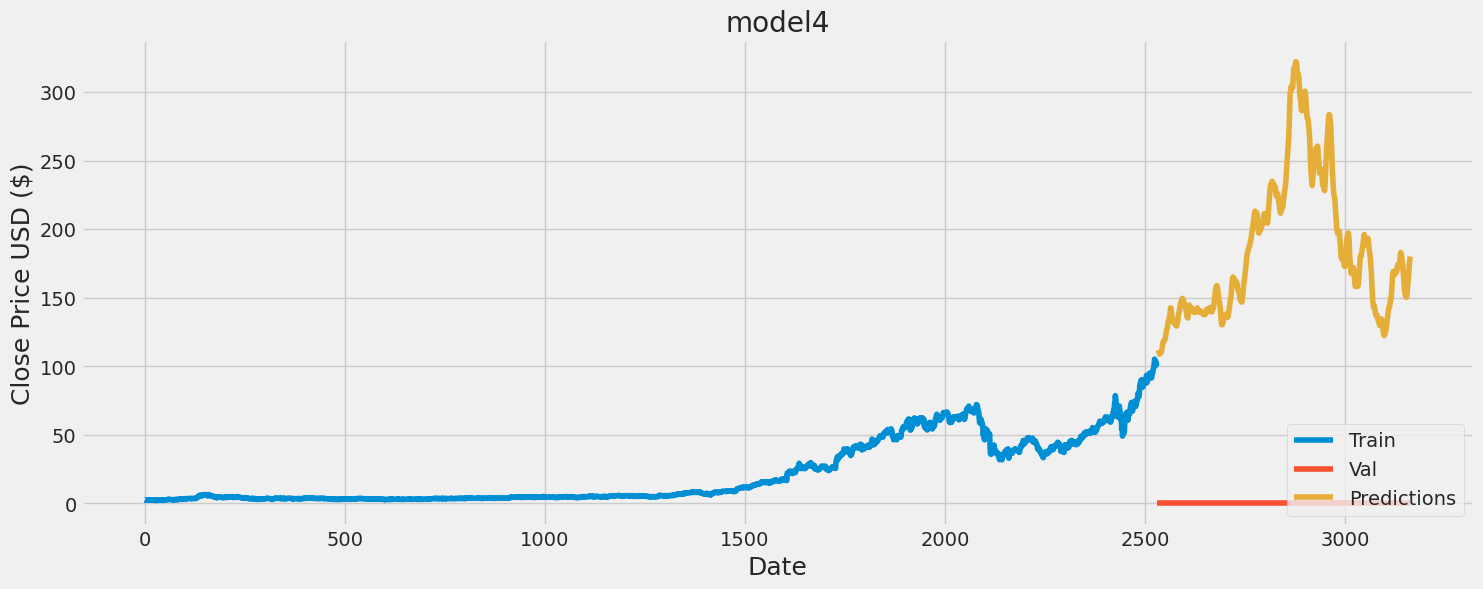

,Close,Predictions
2530,0.0,109.110329
2531,0.0,109.450989
2532,0.0,109.829201
2533,0.0,110.043411
2534,0.0,109.782234
...,...,...
3158,0.0,166.585831
3159,0.0,171.537537
3160,0.0,176.162186
3161,0.0,177.902878


In [13]:
# Get the stock quote
df = com3.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model3.add(Dense(1))

# Compile the model3
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model3.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model3.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

Observation : Company 3 would have definitely performed bad using Linear regression as the market value spiked till 300 from 100 in just 7-8 Months. 

In [6]:
comp3=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633+x)
comp3['Id']=L
comp3['Close']=final_sub

comp3.to_csv('jai633com3.csv',index=False)

In [ ]:
print(final_sub)

# LINEAR REGRESSION COMPANY 4**

In [3]:
from sklearn.linear_model import LinearRegression
com4.drop(['Company'],inplace=True,axis=1)

df = com4.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


[100.71828791520078, 110.03754018254357, 104.9098632567935, 106.60447844700825, 100.69416524773938, 94.93919556765044, 103.25851205767106, 98.93435316552242, 100.74145199309042, 100.05210503001297, 95.7813286499488, 99.7488236432107, 99.95662905902178, 99.7597659215599, 100.10164836588784, 97.21299504902059, 94.958370024142, 92.27054229221524, 104.06275508697814, 108.70181660901572, 110.82607746719135, 122.95084424012552, 126.63915115632014, 126.27425166387904, 134.3232476047981, 137.93797298846815, 134.24616823323933, 136.14303917413747, 144.55595401986852, 150.06430643691218, 148.28752532896982, 166.625654116442, 158.72094390233133, 147.92943119265666, 136.48675084297133, 139.19329142510838, 110.2180338211829, 122.50444405709378, 123.79436372011205, 124.61732968301212, 140.32794500623095, 150.85779539206933, 148.35695030206398, 141.993717003993, 148.10847673461595, 149.44085371597123, 142.29401524865523, 126.99105496678654, 129.82722557589705, 136.68028132589282, 141.4355869001279, 1

# COMPANY 4 LSTM**

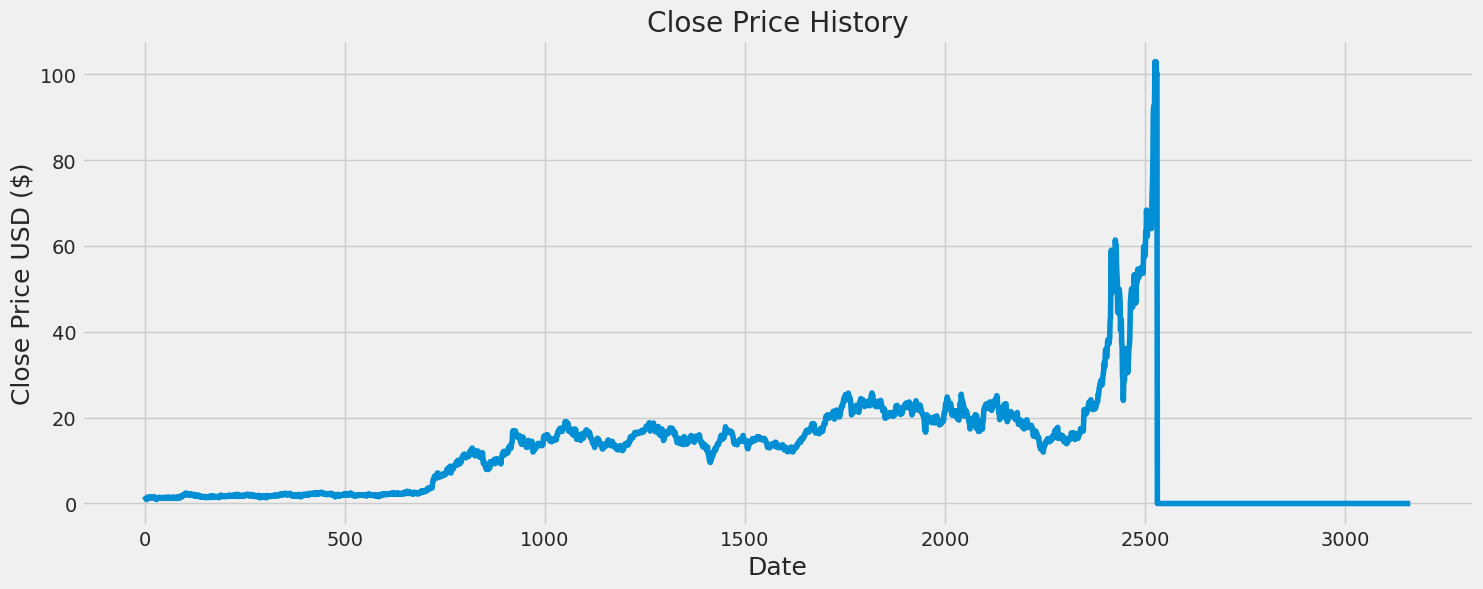

[[1.050000e+00 1.670000e+00 1.240000e+00 1.640000e+00 2.814945e+08]
 [1.640000e+00 2.020000e+00 1.560000e+00 1.690000e+00 2.578065e+08]
 [1.850000e+00 1.830000e+00 1.240000e+00 1.260000e+00 1.232820e+08]
 ...
 [1.364100e+02 1.366600e+02 1.270500e+02 1.286400e+02 1.956803e+08]
 [1.270600e+02 1.299300e+02 1.243900e+02 1.272100e+02 1.702919e+08]
 [1.283700e+02 1.336900e+02 1.272600e+02 1.333700e+02 1.384299e+08]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
495/495 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 2/4
495/495 [==============================] - 3s 5ms/step - loss: 2.8832e-04
Epoch 3/4
495/495 [==============================] - 3s 6ms/step - loss: 2.6607e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
107.01809
107.0180892944336


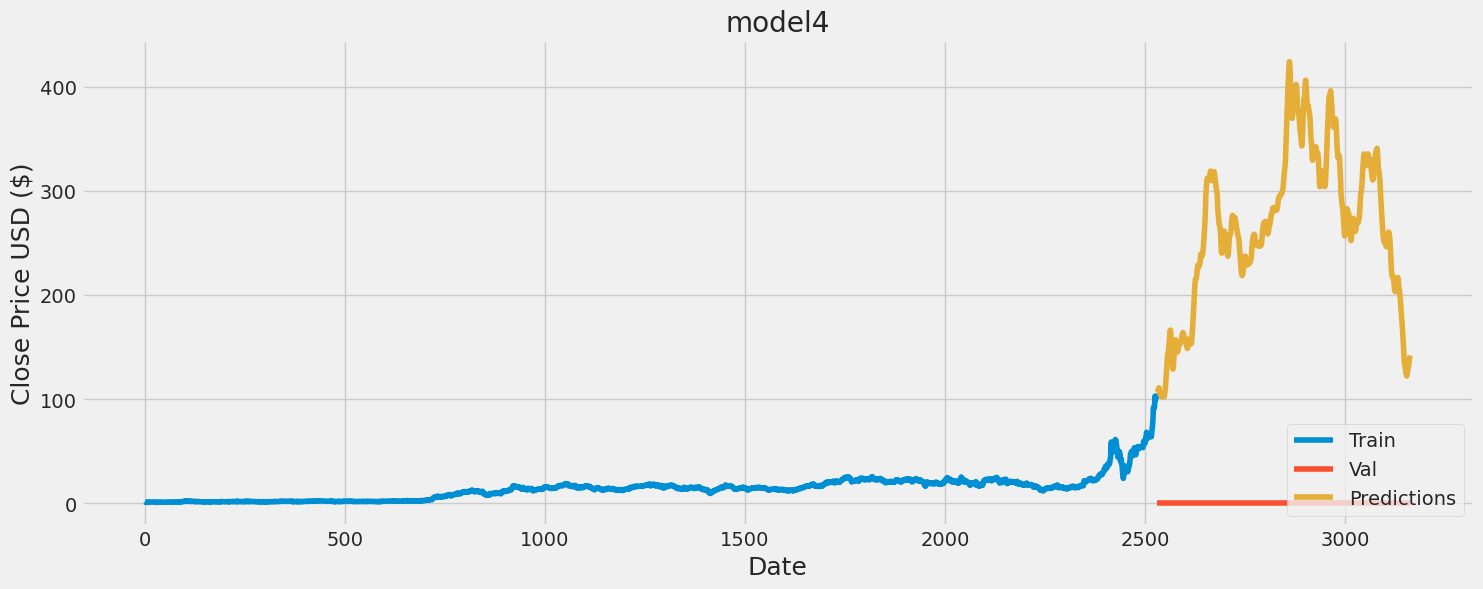

,Close,Predictions
2530,0.0,107.018089
2531,0.0,108.088974
2532,0.0,109.373123
2533,0.0,110.094620
2534,0.0,111.107071
...,...,...
3158,0.0,132.501160
3159,0.0,135.691483
3160,0.0,139.304596
3161,0.0,140.531265


In [15]:
# Get the stock quote
df = com4.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model4 = Sequential()
model4.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model4.add(Dense(1))

# Compile the model3
model4.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model4.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model4.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

Observation : Company 4 also spiked from 100 to 400 in 600 days. Linear regression would have perfomed worse here.

# COMPANY 4 LSTM + Linear Regression

So till now we have used LSTM and Linear Regression but none of them gave better results. But during old contest we made one observation that usually LSTM gives better results than LR in case we need to predict only one value. So we decided to do this for all 633 values. Simply predict the value using LSTM and add it to training set and next time train with the new dataset. But above approach was also failing and we thought of randomly changing the values in Linear regression. This worked the best and gave best public score.


In [5]:

# com4.drop(['Company'],inplace=True,axis=1)

df = com4.iloc[:,0:7]
# Show the data
df
scalerx = []
scalery = []
fin = []
val = 0
for x in range (0,633):
    # print(df)
    print(x)
    # Seperate the dataframe in X and Y
    data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
    data_Y = df.filter(['Close'])
    
    # Convert the dataframes to numpy arrays
    dataset_X = data_X.values

    training_data_len = 2530+x
    if x != 0:
        data_Y['Close'][training_data_len-1]=fin[x-1]
    dataset_Y = data_Y.values

    # Scale the data
    from sklearn.preprocessing import MinMaxScaler

    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaled_data_X = scaler_X.fit_transform(dataset_X)

    scaler_Y = MinMaxScaler(feature_range=(0,1))
    scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
    scalerx.append(scaler_X)
    scalery.append(scaler_Y)
    

    scaled_data_X


    # Create the training data set 
    # Create the scaled training data set
    train_data_X = scaled_data_X[0:int(training_data_len), :]
    train_data_Y = scaled_data_Y[0:int(training_data_len), :]

    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data_X)+1):
        x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                               # other than close is a feature
        y_train.append(train_data_Y[i-1, :]) # actual close value that comes next


    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    # Build the LSTM model
    model4 = Sequential()
    model4.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
    # model1.add(LSTM(64, return_sequences=False))
    model4.add(Dense(1))

    # Compile the model1
    model4.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model1
    model4.fit(x_train, y_train, batch_size=8, epochs=4)


    # Create the testing data set
    # Use the remaining amount as testing data

    test_data_X = scaled_data_X[training_data_len - 59: , :] # Selecting last 59 values from training data.

    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset_Y[training_data_len:training_data_len+1 ,0]  

    for i in range(60, len(test_data_X)+1):
        x_test = []
        x_test.append(test_data_X[i-60:i, :]) # For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
        break


    x_test = np.array(x_test)
        
    predictions = model4.predict(x_test)

    predictions = scaler_Y.inverse_transform(predictions)

    y_test=y_test.reshape((1,1))
    z = 5
    val = predictions

    fin.append(val)




0
Epoch 1/4
309/309 [==============================] - 10s 7ms/step - loss: 4.0867e-05
Epoch 2/4
309/309 [==============================] - 2s 5ms/step - loss: 1.4163e-05
Epoch 3/4
309/309 [==============================] - 2s 5ms/step - loss: 1.1255e-05
Epoch 4/4
1/1 [==============================] - 0s 363ms/step
1
Epoch 1/4
309/309 [==============================] - 3s 5ms/step - loss: 3.2881e-05
Epoch 2/4
309/309 [==============================] - 1s 4ms/step - loss: 1.6276e-05
Epoch 3/4
309/309 [==============================] - 1s 4ms/step - loss: 1.5348e-05
Epoch 4/4
1/1 [==============================] - 0s 342ms/step
2
Epoch 1/4
310/310 [==============================] - 3s 6ms/step - loss: 5.7080e-05
Epoch 2/4
310/310 [==============================] - 2s 5ms/step - loss: 1.9649e-05
Epoch 3/4
310/310 [==============================] - 2s 5ms/step - loss: 1.3858e-05
Epoch 4/4
1/1 [==============================] - 0s 358ms/step
3
Epoch 1/4
310/310 [===========================

In [6]:
# y=np.random.randint(2, size=633)
# The below y was used which was generated by random.randint. For final answer use this given y as we 
y=[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]
g=[]
for x in range (0,633):
    if y[x]==1:
        final_sub[x]=fin[x][0][0]
        g.append(1)
    else:
        g.append(0)

print(g)

[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

In [7]:
comp4=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(x)
comp4['Id']=L
comp4['Close']=final_sub

comp4.to_csv('comp4_633.csv',index=False)

Note : LSTM gives different values everytime. So some error is expected for sure.

Note : The above code gives us company 4 data which we changed in final submission of linear regression. Rest we did same for company 3 and company 2 and the codes are provided in seperate pynb file.

Note : To run LSTM + LR for each company you require 2 hrs with GPU T4 x2

Refrences : 

1) https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
.
2) https://stackoverflow.com/questions/46119435/keras-lstm-why-different-results-with-same-model-same-weights
.
3) Andrew NG lecture (weighted approach)
.
4) Trading View Indicators
.
5) https://www.researchgate.net/publication/348390803